In [4]:
import numpy as np, sys,os
import pandas as pd
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm
sys.path.insert(0, "..")
import src.utils.dtw as dtw
from src.visualization.visualize import plot_original_and_augmented
from src.visualization.visualize import plot_series



In [66]:
timeSeries = pd.read_json('../data/processed/realData.json', orient='records', lines=True)
# Filtrar las series de tiempo por clase
healthy_df = timeSeries[timeSeries['class'] == 'Healthy']['cop_x']
neuropathic_df = timeSeries[timeSeries['class'] == 'Neuropathic']['cop_x']
diabetic_df = timeSeries[timeSeries['class'] == 'Diabetic']['cop_x']

In [63]:
import numpy as np

def random_warping(series, sigma=0.2):
    """
    Apply random warping to a time series.
    
    Args:
    - series: Original time series (1D array-like, should be convertible to numpy array).
    - sigma: Standard deviation of the random warping. Default is 0.2.
    
    Returns:
    - warped_series: Randomly warped time series.
    """
    # Convert series to numpy array and ensure it's of type float64
    series = np.asarray(series, dtype=np.float64)
    
    length = len(series)
    
    # Generate random warping indices
    random_indices = np.random.normal(loc=np.arange(length), scale=sigma)
    
    # Clip indices to ensure they are within valid range
    random_indices = np.clip(random_indices, 0, length - 1)
    
    # Round and convert indices to integers
    random_indices = np.round(random_indices).astype(int)
    
    # Interpolate the series based on the random warping indices
    # Ensure the indices are unique to avoid issues with np.interp
    unique_indices = np.unique(random_indices)
    warped_series = np.interp(np.arange(length), unique_indices, series[unique_indices], left=series[0], right=series[-1])
    
    return warped_series

# Ejemplo de uso con healthy_df.iloc[0]
data = healthy_df.iloc[0]
augmented = random_warping(data)



In [76]:
import pandas as pd
import numpy as np

# Leer el archivo JSON con las series de tiempo
timeSeries = pd.read_json('../data/processed/realData.json', orient='records', lines=True)

# Filtrar las series de tiempo por clase y seleccionar la columna 'cop_x'
healthy_df = timeSeries[timeSeries['class'] == 'Healthy']['cop_x']
neuropathic_df = timeSeries[timeSeries['class'] == 'Neuropathic']['cop_x']
diabetic_df = timeSeries[timeSeries['class'] == 'Diabetic']['cop_x']

# Definir la función random_warping
def random_warping(series, sigma=0.5):
    """
    Apply random warping to a time series.
    
    Args:
    - series: Original time series (1D array-like, should be convertible to numpy array).
    - sigma: Standard deviation of the random warping. Default is 0.2.
    
    Returns:
    - warped_series: Randomly warped time series.
    """
    # Convert series to numpy array and ensure it's of type float64
    series = np.asarray(series, dtype=np.float64)
    
    length = len(series)
    
    # Generate random warping indices
    random_indices = np.random.normal(loc=np.arange(length), scale=sigma)
    
    # Clip indices to ensure they are within valid range
    random_indices = np.clip(random_indices, 0, length - 1)
    
    # Round and convert indices to integers
    random_indices = np.round(random_indices).astype(int)
    
    # Ensure the indices are unique to avoid issues with np.interp
    unique_indices = np.unique(random_indices)
    
    # Interpolate the series based on the random warping indices
    warped_series = np.interp(np.arange(length), unique_indices, series[unique_indices], left=series[0], right=series[-1])
    
    return warped_series

# Crear copias de los DataFrames filtrados
healthy_df_copy = healthy_df.copy()
neuropathic_df_copy = neuropathic_df.copy()
diabetic_df_copy = diabetic_df.copy()

# Aplicar random_warping a la columna 'cop_x' de cada DataFrame
healthy_df_copy = healthy_df_copy.apply(random_warping)
neuropathic_df_copy = neuropathic_df_copy.apply(random_warping)
diabetic_df_copy = diabetic_df_copy.apply(random_warping)

# Verificar los DataFrames modificados
print("\nHealthy DataFrame después de random warping:")
print(healthy_df_copy.head())

print("\nNeuropathic DataFrame después de random warping:")
print(neuropathic_df_copy.head())

print("\nDiabetic DataFrame después de random warping:")
print(diabetic_df_copy.head())


IndexError: arrays used as indices must be of integer (or boolean) type

: 

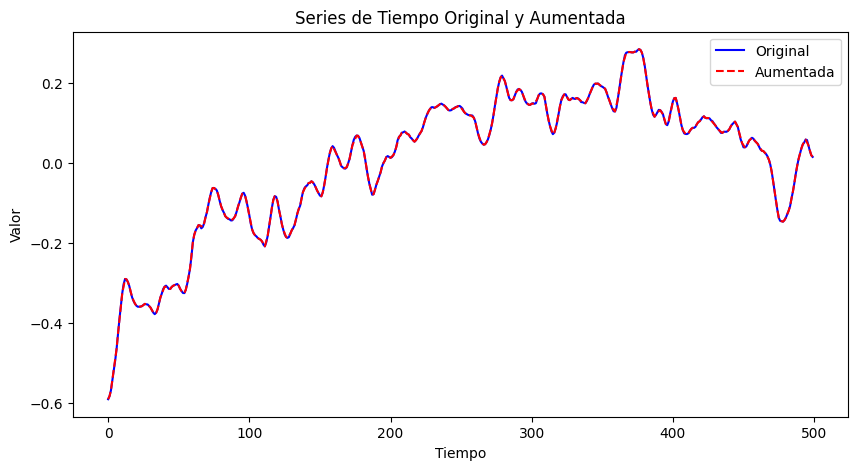

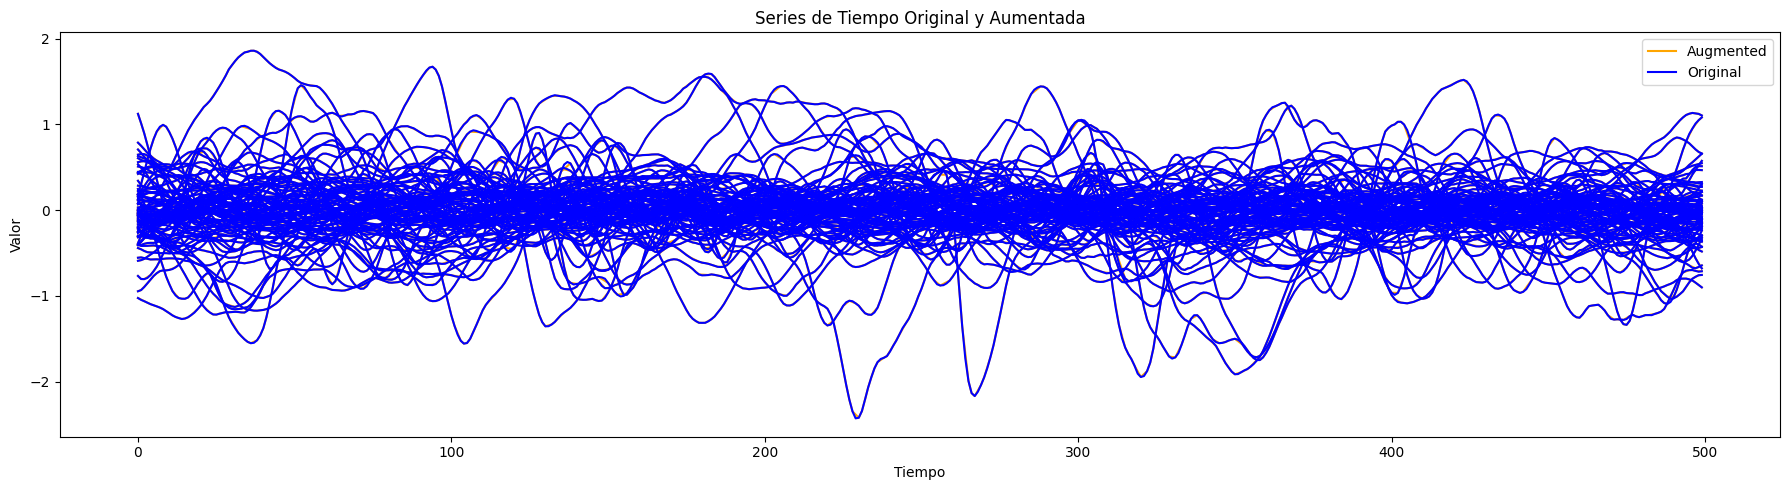

In [75]:
plot_original_and_augmented(healthy_df[0], healthy_df_copy[0])
plot_series(healthy_df, healthy_df_copy, False)